# HW review
### Edgar Larios, David Larios
Building code to extract motor production dynamics from imaging data.

In [1]:
from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import csv

Load data

In [8]:
paths = glob.glob("/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/k401-activedrops/img_*********_gfp-4x_000.tif")
paths = sorted(paths) # 1104 images in total

calibrationCurvePaths = glob.glob("/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/calibration_curve/***ugml.tif")
calibrationCurvePaths = sorted(calibrationCurvePaths) # 9 sample images used to get an equation for Protein Concentration

#### Original code:

In [ ]:
# Function to calculate mean intensity for experiment images
def calculateMeanIntensity(paths):
    for i in range(0,len(paths)):
        image_path = paths[i]
        image_matrix = io.imread(image_path)
        plt.imshow(image_matrix, cmap='gray')
        plt.title('Loaded Image as Matrix')
        print()
        meanIntensity = image_matrix.mean()
        meanIntensity_List.append(meanIntensity)

# Function to calculate mean intensity for calibration images
def getConcentration(calibrationCurvePaths):
    for i in range(0, len(calibrationCurvePaths)):
        image_path = calibrationCurvePaths[i]
        image_matrix = io.imread(image_path)
        plt.imshow(image_matrix, cmap='gray')
        plt.title('Loaded Image as Matrix')
        print()
        meanIntensity = image_matrix.mean()
        meanIntensity_CalibrationCurve_List.append(meanIntensity) 
    # Additional code for fitting and transformation


#### Optimized code:

In [ ]:
def calculateMeanIntensity(image_paths):
    mean_intensities = []
    for image_path in image_paths:
        image_matrix = io.imread(image_path)
        mean_intensities.append(image_matrix.mean())
    return mean_intensities


Explanation:

You had two separate functions doing almost the same thing: reading images and calculating mean intensity.

Improvement: I consolidated these into a single function, calculateMeanIntensity, that can handle both sets of images. This reduces redundancy and makes the code cleaner.

#### Original code:

In [ ]:
meanIntensity_List = list()
meanIntensity_CalibrationCurve_List = list()
# Functions manipulate these global lists directly


#### Optimized code:

In [ ]:
def calculateMeanIntensity(image_paths):
    mean_intensities = []
    for image_path in image_paths:
        image_matrix = io.imread(image_path)
        mean_intensities.append(image_matrix.mean())
    return mean_intensities

mean_intensities = calculateMeanIntensity(paths)


Explanation:

Using global variables can lead to code that is hard to debug and maintain. Functions should not have side effects on global state when it can be avoided.

Improvement: I modified the functions to return values instead of modifying global lists. This makes the functions pure and easier to test and reason about.

#### Original code:

In [10]:
def constructDataFrames(timeInterval):
    global meanIntensity_List
    global proteinConcentration_List
    # Function logic using global variables


#### Optimized code:

In [12]:
def constructDataFrame(mean_intensities, protein_concentrations, time_interval):
    df = pd.DataFrame({
        "Time (min)": np.arange(len(mean_intensities)) * time_interval,
        "Mean Intensity": mean_intensities,
        "Protein Concentration (µg/ml)": protein_concentrations
    })
    return df


Explanation:

The function constructDataFrames relied on global variables, which is not good practice.

Improvement: I parameterized the function to take necessary arguments (mean_intensities, protein_concentrations, time_interval). This makes the function more flexible and reusable.

#### Original code:

In [ ]:
def getNumberOfProteinMolecules(dropletVolume, timeInterval):
    global numberOfProteinMolecules_List
    proteinMass_List = [i * dropletVolume for i in proteinConcentration_List]
    numberOfProteinMolecules_List = [j * 6000000000 for j in proteinMass_List]


#### Optimized code:

In [13]:
def getNumberOfProteinMolecules(protein_concentrations, droplet_volume):
    protein_mass_list = [concentration * droplet_volume for concentration in protein_concentrations]
    return [mass * 6e9 for mass in protein_mass_list]  # Using scientific notation for readability


Explanation:

You used global variables and hard-coded values in a less readable form.

Improvement: I used local variables and scientific notation (6e9) for better readability. This also returns the results directly, avoiding side effects on global state.

#### Original code:

In [14]:
def constructDataFrames(timeInterval):

    global meanIntensity_List
    global proteinConcentration_List

    minimumIntensityValue = min(meanIntensity_List)
    adjustedMeanIntensity_List = [x - minimumIntensityValue for x in meanIntensity_List] # Subsract the minimum mean intensity value from ALL values
    meanIntensity_List = adjustedMeanIntensity_List
    print()

    minimumProteinConcentration = min(proteinConcentration_List)
    adjustedProteinConcentration_List = [x - minimumProteinConcentration for x in proteinConcentration_List]
    proteinConcentration_List = adjustedProteinConcentration_List
    print()

    df = pd.DataFrame(meanIntensity_List).reset_index() # Create a data frame 
    df = df.rename(columns={"index":"Time (min)", 0:"Mean Intensity"})
    df["Time (min)"] = df["Time (min)"] * timeInterval # Manipulate the "time" values

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(df['Time (min)'], df['Mean Intensity'], marker='o')
    plt.title('Mean Intensity vs Time')
    plt.xlabel('Time (t)')
    plt.ylabel('Mean Intensity')
    plt.grid(True)
    plt.show()

    df2 = pd.DataFrame(proteinConcentration_List).reset_index()
    df2 = df2.rename(columns={"index":"Time (min)", 0:"Protein Concentration (microgram / milliliter)"})
    df2["Time (min)"] = df2["Time (min)"] * timeInterval # Manipulate the "time" values
    
    # save dataframes to csv files

    # Plot the data
    plt.figure(figsize=(10, 6))
    plt.plot(df2['Time (min)'], df2['Protein Concentration (microgram / milliliter)'], marker='o')
    plt.title('Protein Concentration vs Time')
    plt.xlabel('Time (t)')
    plt.ylabel('Protein Concentration (microgram / milliliter)')
    plt.grid(True)
    plt.show()

#### Optimized code:

In [ ]:
def plotData(df, x_col, y_col, title, x_label, y_label):
    plt.figure(figsize=(10, 6))
    plt.plot(df[x_col], df[y_col], marker='o')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()


Explanation:

Your function constructDataFrames combined data manipulation and plotting.

Improvement: I separated plotting into its own function, plotData, which can be reused for different data sets. This makes the code more modular and easier to understand.

Summary

-Consolidation: Reused calculateMeanIntensity for both experiment and calibration images.

-Global Variables: Avoided them by returning values from functions.

-Parameterization: Passed necessary data as parameters to functions.

-Efficiency: Used list comprehensions and local variables.

-Modularity: Separated plotting into its own function.

### Optimized full code:

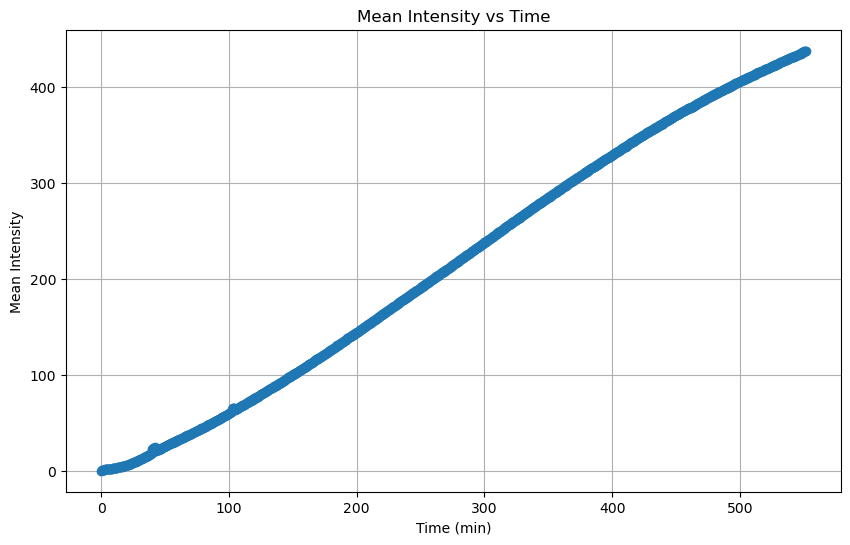

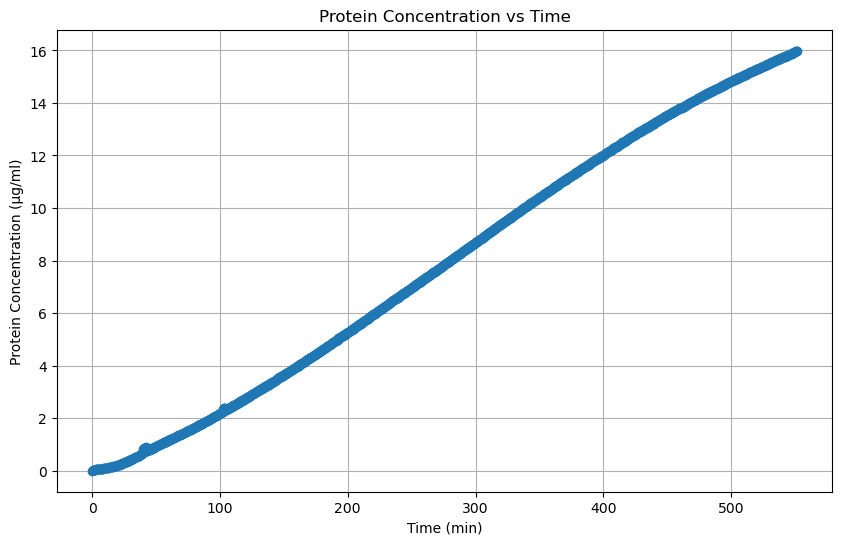

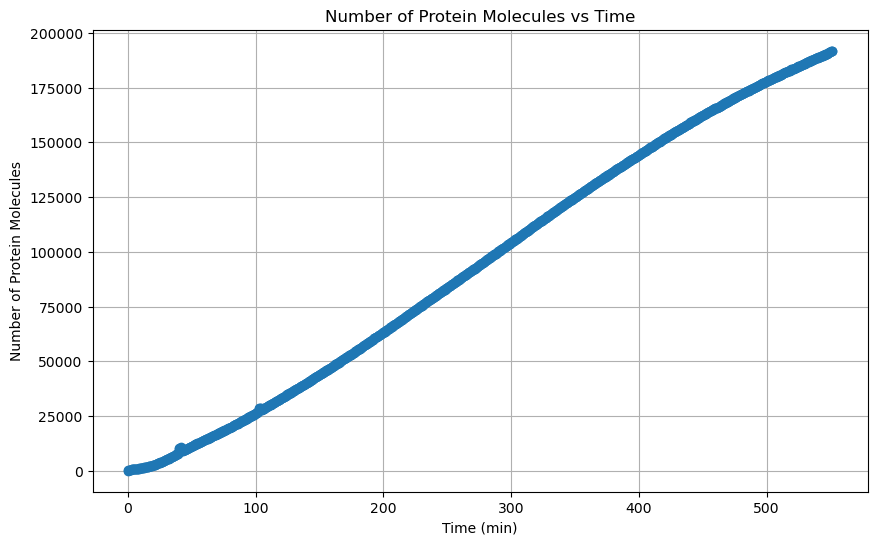

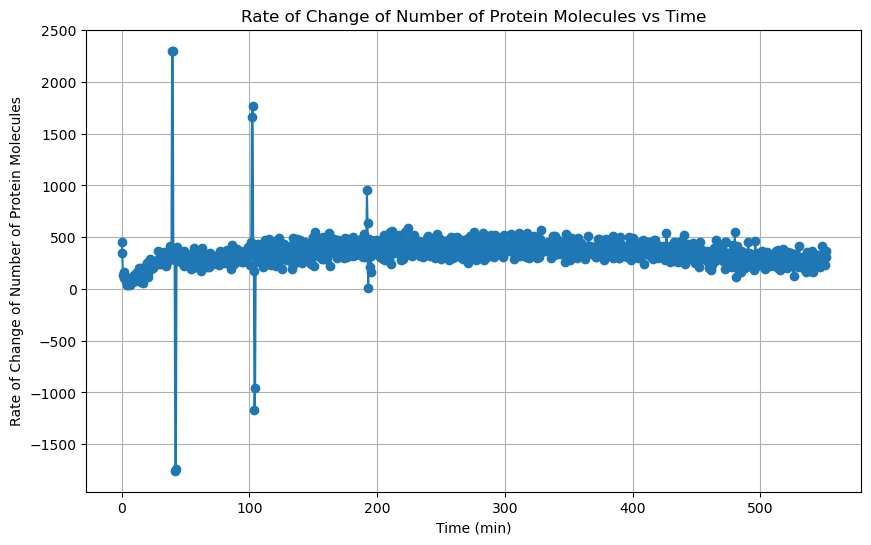

In [18]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

paths = glob.glob("../../Thomson Lab Dropbox/SURF_activedrops/Edgar/k401-activedrops/img_0000*****_gfp-4x_000.tif")
paths = sorted(paths) # 1104 images in total

calibrationCurvePaths = glob.glob("../../Thomson Lab Dropbox/SURF_activedrops/Edgar/calibration_curve/***ugml.tif")
calibrationCurvePaths = sorted(calibrationCurvePaths) # 9 sample images used to get an equation for Protein Concentration

def calculateMeanIntensity(image_paths):
    mean_intensities = []
    for image_path in image_paths:
        image_matrix = io.imread(image_path)
        mean_intensities.append(image_matrix.mean())
    return mean_intensities

def getCalibrationEquation(calibration_paths):
    mean_intensities = calculateMeanIntensity(calibration_paths)
    sample_concentration_values = [0, 2, 5, 10, 20, 40, 80, 160, 320]
    
    df = pd.DataFrame({
        "Protein Concentration (µg/ml)": sample_concentration_values,
        "Mean Intensity": mean_intensities
    })
    
    slope, intercept = np.polyfit(df["Protein Concentration (µg/ml)"], df["Mean Intensity"], 1)
    
    return slope, intercept

def calculateProteinConcentration(mean_intensities, slope, intercept):
    return [(intensity - intercept) / slope for intensity in mean_intensities]

def adjustValues(values):
    min_value = min(values)
    return [value - min_value for value in values]

def constructDataFrame(mean_intensities, protein_concentrations, time_interval):
    df = pd.DataFrame({
        "Time (min)": np.arange(len(mean_intensities)) * time_interval,
        "Mean Intensity": mean_intensities,
        "Protein Concentration (µg/ml)": protein_concentrations
    })
    return df

def plotData(df, x_col, y_col, title, x_label, y_label):
    plt.figure(figsize=(10, 6))
    plt.plot(df[x_col], df[y_col], marker='o')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

def getNumberOfProteinMolecules(protein_concentrations, droplet_volume):
    protein_mass_list = [concentration * droplet_volume for concentration in protein_concentrations]
    return [mass * 6e9 for mass in protein_mass_list]  # Using scientific notation for readability

def getRateOfChange(values, time_interval):
    t_vals = np.arange(len(values)) * time_interval
    return np.gradient(values, t_vals)

def runAnalysis():
    mean_intensities = calculateMeanIntensity(paths)
    slope, intercept = getCalibrationEquation(calibrationCurvePaths)
    protein_concentrations = calculateProteinConcentration(mean_intensities, slope, intercept)
    
    adjusted_mean_intensities = adjustValues(mean_intensities)
    adjusted_protein_concentrations = adjustValues(protein_concentrations)
    
    time_interval = 0.5
    droplet_volume = 2e-6  # 2 microliters
    
    df = constructDataFrame(adjusted_mean_intensities, adjusted_protein_concentrations, time_interval)
    
    plotData(df, "Time (min)", "Mean Intensity", "Mean Intensity vs Time", "Time (min)", "Mean Intensity")
    plotData(df, "Time (min)", "Protein Concentration (µg/ml)", "Protein Concentration vs Time", "Time (min)", "Protein Concentration (µg/ml)")
    
    num_protein_molecules = getNumberOfProteinMolecules(adjusted_protein_concentrations, droplet_volume)
    df["Number of Protein Molecules"] = num_protein_molecules
    
    plotData(df, "Time (min)", "Number of Protein Molecules", "Number of Protein Molecules vs Time", "Time (min)", "Number of Protein Molecules")
    
    rate_of_change = getRateOfChange(num_protein_molecules, time_interval)
    
    df["Rate of Change of Number of Protein Molecules"] = rate_of_change
    plotData(df, "Time (min)", "Rate of Change of Number of Protein Molecules", "Rate of Change of Number of Protein Molecules vs Time", "Time (min)", "Rate of Change of Number of Protein Molecules")
    
    return df

# Run the analysis
df_result = runAnalysis()